In [3]:
#loading in packages and robjects
#loading necessary packages
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)
library(here)
library(tidyverse)
library(viridis)
library(RColorBrewer)
library(datasets)
library(readxl)
library(lattice)                              
library(reshape2)

'data.frame':	20 obs. of  3 variables:
 $ Sample: chr  "Control" "Control" "Control" "Control" ...
 $ MtPT4 : num  0.22 0.84 0.15 -0.86 -0.35 1.65 1.66 2.39 0.35 3.37 ...
 $ RiTUB : num  0.41 -0.08 -0.09 -5.47 -0.84 2.83 2.82 3.63 0.23 5.26 ...


            Df Sum Sq Mean Sq F value   Pr(>F)    
Sample       1  27.78  27.777   34.18 1.55e-05 ***
Residuals   18  14.63   0.813                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
Sample       1  91.98   91.98   29.63 3.59e-05 ***
Residuals   18  55.87    3.10                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

'data.frame':	40 obs. of  3 variables:
 $ Sample  : chr  "Control" "Control" "Control" "Control" ...
 $ variable: Factor w/ 2 levels "MtPT4","RiTUB": 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : num  0.22 0.84 0.15 -0.86 -0.35 1.65 1.66 2.39 0.35 3.37 ...


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


png 
  2

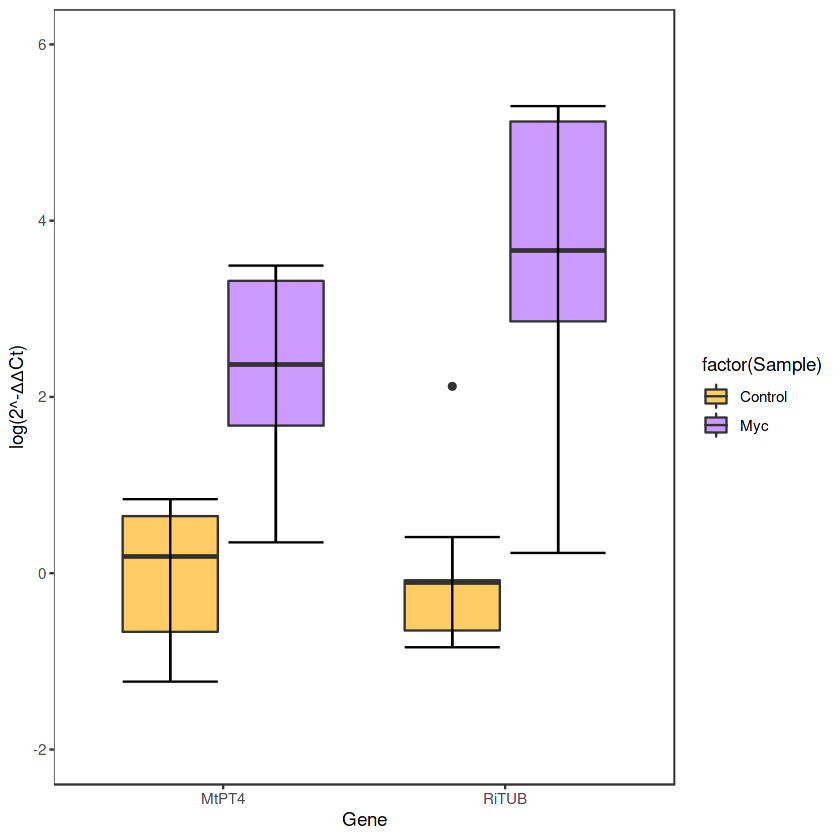

In [4]:
#Supplemental Figure 2 panel a
qpcr <- read.csv("/global/homes/k/kserrano/Desktop/qpcr1.csv")
str(qpcr)

# analysis of variance
anova1 <- aov(MtPT4 ~ Sample, data = qpcr)
summary(anova1)
anova2 <- aov(RiTUB ~ Sample, data = qpcr)
summary(anova2)

#reshaping data into long format
qpcr_long <- melt(qpcr, id = "Sample")                      
str(qpcr_long)

#plotting, got rid of one outlier
ggplot(qpcr_long, aes(x=factor(variable), y= value, fill=factor(Sample))) +
  geom_boxplot() +
  stat_boxplot(geom='errorbar') +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  labs(x="Gene", y="log(2^-∆∆Ct)") +
  scale_fill_manual(values=c("#FFCC66", "#CC99FF")) + 
 ylim(-2,6)

#saving
svg("qpcr.svg")

# Code of the plot
ggplot(qpcr_long, aes(x=factor(variable), y= value, fill=factor(Sample))) +
  geom_boxplot() +
  stat_boxplot(geom='errorbar') +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  labs(x="Gene", y="log(2^-∆∆Ct)") +
  scale_fill_manual(values=c("#FFCC66", "#CC99FF")) + 
 ylim(-2,6)

# Close the graphics device
dev.off() 

'data.frame':	20 obs. of  6 variables:
 $ Treatment: chr  "Control" "Control" "Control" "Control" ...
 $ F        : num  0 0 1.67 1.67 6.67 ...
 $ M        : num  0 0 0.02 0.02 0.33 ...
 $ A        : num  0 0 0 0 0 ...
 $ H        : num  0 0 0 0 0.03 ...
 $ V        : num  0 0 0 0 0 0.05 1.5 6.95 0 7.42 ...


            Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment    1  35981   35981   478.8 2.03e-14 ***
Residuals   18   1353      75                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment    1  14421   14421   194.4 4.35e-11 ***
Residuals   18   1335      74                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment    1  11906   11906   109.5 4.41e-09 ***
Residuals   18   1957     109                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment    1   3618    3618   30.38 3.11e-05 ***
Residuals   18   2144     119                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    1  34.93   34.93   7.981 0.0112 *
Residuals   18  78.77    4.38                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

'data.frame':	100 obs. of  3 variables:
 $ Treatment: chr  "Control" "Control" "Control" "Control" ...
 $ variable : Factor w/ 5 levels "F","M","A","H",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value    : num  0 0 1.67 1.67 6.67 ...


png 
  2

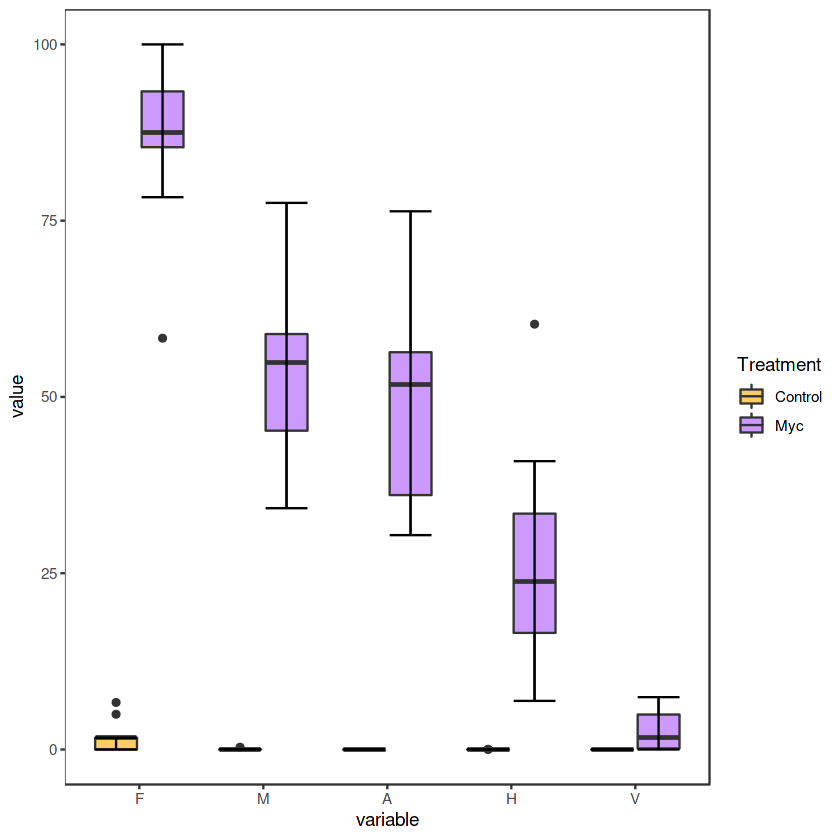

In [5]:
#Supplemental Figure 2 Panel b
col <- read.csv("/global/homes/k/kserrano/Desktop/col1.csv")
str(col)

# analysis of variance
anova1 <- aov(F ~ Treatment, data = col)
summary(anova1)
anova2 <- aov(M ~ Treatment, data = col)
summary(anova2)
anova3 <- aov(A ~ Treatment, data = col)
summary(anova3)
anova4 <- aov(H ~ Treatment, data = col)
summary(anova4)
anova5 <- aov(V ~ Treatment, data = col)
summary(anova5)

 # Reshaping harvest1 data
col_long <- melt(col, id = "Treatment")                     
str(col_long)

#plotting
ggplot(col_long, aes(x = variable, y = value, fill = Treatment)) +  # ggplot function
  geom_boxplot() +
  stat_boxplot(geom='errorbar') +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  scale_fill_manual(values=c("#FFCC66", "#CC99FF")) 

#saving
svg("col.svg")

# Code of the plot
ggplot(col_long, aes(x = variable, y = value, fill = Treatment)) +  # ggplot function
  geom_boxplot() +
  stat_boxplot(geom='errorbar') +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  scale_fill_manual(values=c("#FFCC66", "#CC99FF")) 

# Close the graphics device
dev.off() 